In [2]:
import json
import yaml
import matplotlib.pyplot as plt
import os

def plotFormFactor(expFormFactor,k):
    xValues = []
    yValues = []
    for i in expFormFactor:
        xValues.append(i[0])
        yValues.append(k*i[1])
    plt.plot(xValues,yValues)



def plotOrderParameters(OPsim, OPexp):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(key)
            yValuesSN1sim.append(float(OPsim[key][0][0]))
            yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(key)
            yValuesSN2sim.append(float(OPsim[key][0][0]))
            yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key:
            xValuesHG.append(key)
            yValuesHGsim.append(float(OPsim[key][0][0]))
            yValuesHGexp.append(OPexp[key][0][0])
    #print(xValues,yValues)
    plt.plot(xValuesHG,yValuesHGsim)
    plt.plot(xValuesHG,yValuesHGexp)
    plt.show()
    plt.plot(xValuesSN1,yValuesSN1sim)
    plt.plot(xValuesSN1,yValuesSN1exp)
    plt.show()
    plt.plot(xValuesSN2,yValuesSN2sim)
    plt.plot(xValuesSN2,yValuesSN2exp)
    plt.show()


def plotSimulation(path, lipid):
    DataBankPath = '../../Databank/Data/'
    path = DataBankPath + path
    #lipid = 'POPC'
    FFpathSIM = path + 'FormFactor.json'
    OPpathSIM = path + lipid + 'OrderParameters.json'
    READMEfilepath = path + '/README.yaml'
    FFQualityFilePath = path + '/FormFactorQuality.json'

    with open(READMEfilepath) as yaml_file:
        readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
   
    with open(FFQualityFilePath) as json_file:
        FFq = json.load(json_file)
    
    for subdir, dirs, files in os.walk(DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/'):
            for filename in files:
                #filepath = '../../Data/experiments/FormFactors/' + expFFpath + '/' + filename
                if filename.endswith('_FormFactor.json'):
                        FFpathEXP = subdir + filename
    #FFpathEXP =  DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/POPS_ULV_25Cin0D_SHE_FormFactor.json'
    with open(FFpathEXP) as json_file:
        FFexp = json.load(json_file)
    
    with open(OPpathSIM) as json_file:
        OPsim = json.load(json_file)

    OPexp = {}
    for expOPfolder in list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values()):
        #expOPfolder = list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values())[0]
        OPpathEXP =  DataBankPath + 'experiments/OrderParameters/' + expOPfolder + '/' + lipid + '_Order_Parameters.json'
        #print(OPpathEXP)
        with open(OPpathEXP) as json_file:
            OPexp.update(json.load(json_file))
    #print(OPexp)

    try:
        with open(FFpathSIM) as json_file:
            FFsim = json.load(json_file)
        plotFormFactor(FFsim,1)
        plotFormFactor(FFexp,FFq[1])
        plt.show()
    except:
        print('Form factor plotting failed')
    
    plotOrderParameters(OPsim, OPexp)
    #print(OPsim)
    #print(OPexp)

# Overall best simulation Slipids POPC (10.5281/zenodo.166034)

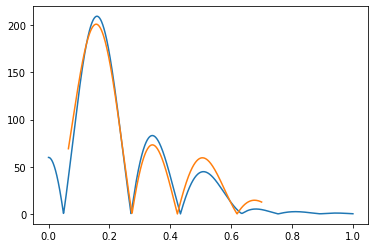

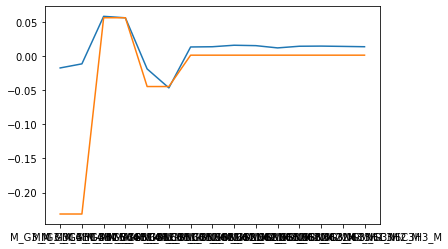

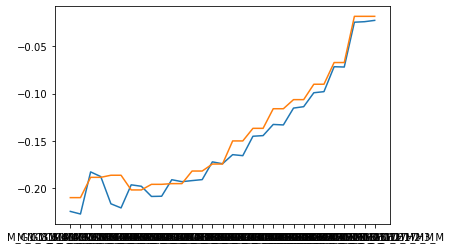

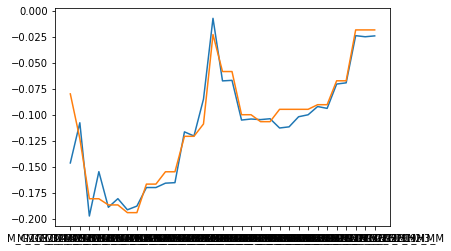

In [4]:
plotSimulation('Simulations/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/', 'POPC')

# Best quality for sn-1 chain POPE slipids (10.5281/zenodo.1293813)

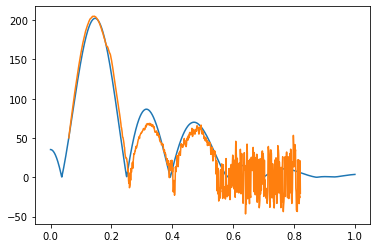

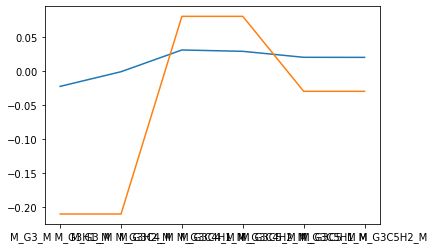

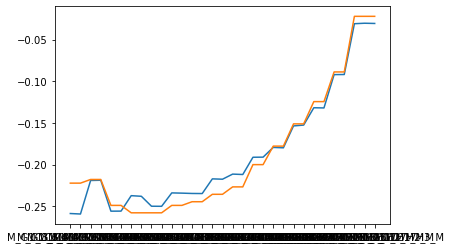

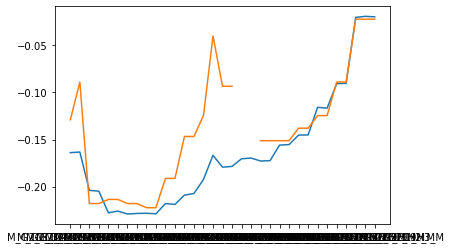

In [11]:
plotSimulation('Simulations/ba8/888/ba888896d74d078c25b29ae4c106c0096146205f/7ac0f9ece8f6b64afaefad36e542a4162bac4b33/','POPE')

# Second best quality for sn-2 chain in Berger POPC (10.5281/zenodo.4643875)

Form factor plotting failed


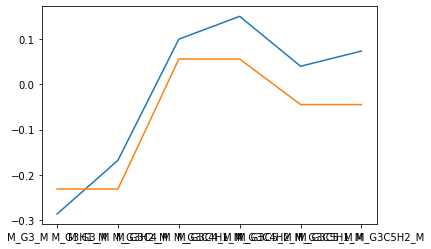

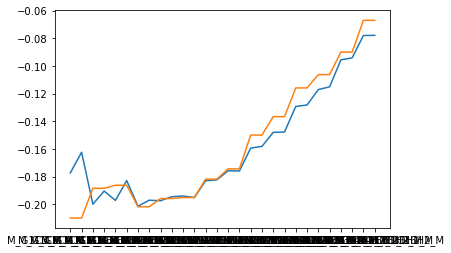

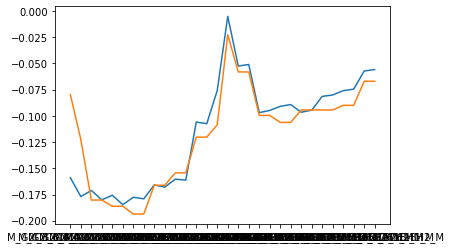

In [8]:
plotSimulation('Simulations/b06/79c/b0679cd5bb4bed509b91a002305d2771ed4ad54e/72ec31258e95aefa0d053131b9e734b4b11eb030/','POPC')

# Best quality for headgroup from CHARMM36 POPC (10.5281/zenodo.5767451)

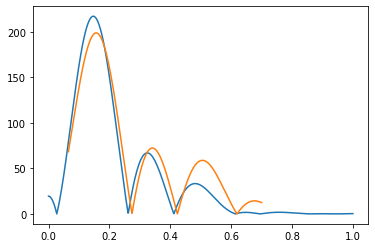

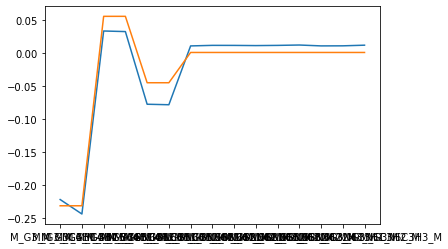

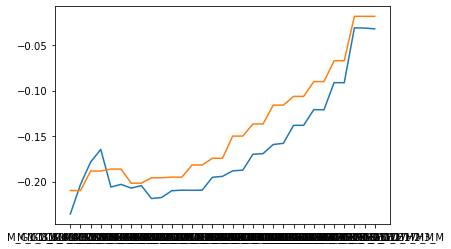

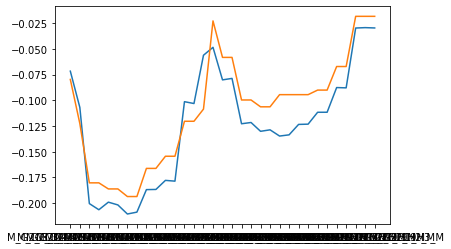

In [9]:
plotSimulation('Simulations/289/db0/289db0867ffc0e8e7a58ffc7c617f69eb7c60e82/1e1325dc1168c632b9978eaab70e8df6e34afbf3/','POPC')

# Best quality for form factor in Slipids POPE (10.5281/zenodo.3231342)

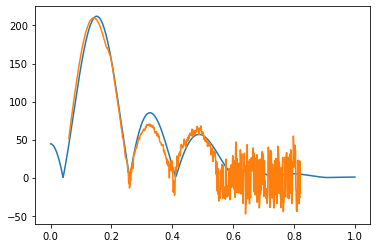

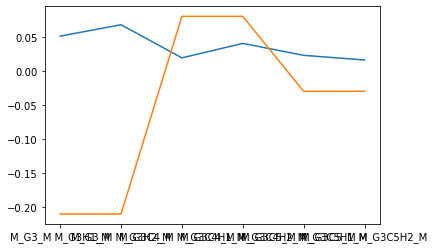

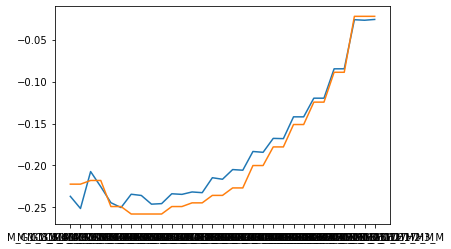

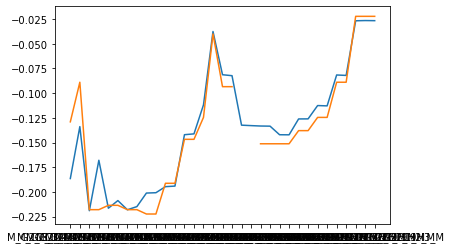

In [10]:
plotSimulation('Simulations/415/930/41593025f50adfceb2c888fed44afe0b1b7fe8da/34bafde4722aae82cc5972f9e30a54065d67159a/','POPE')

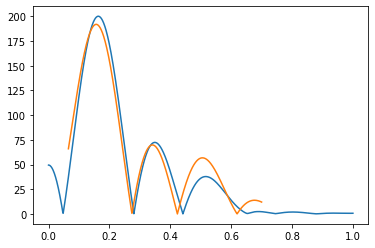

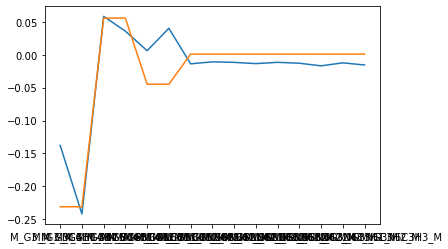

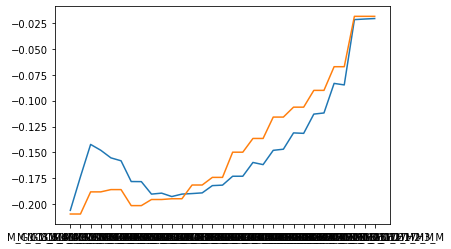

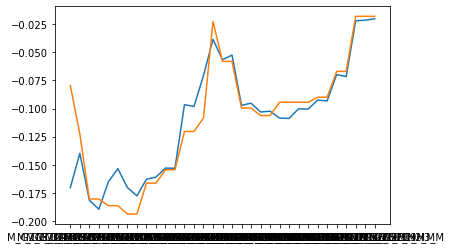

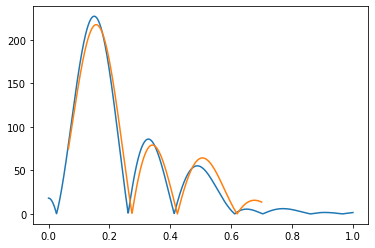

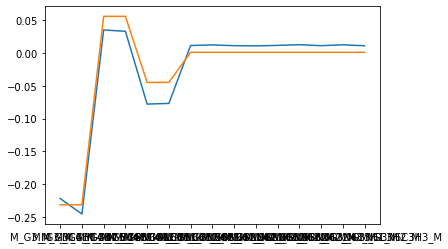

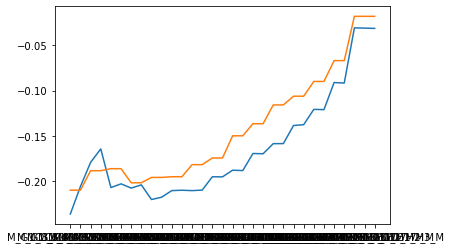

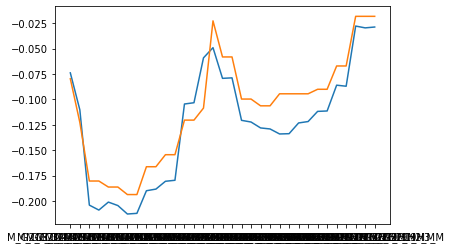

In [5]:
# 10.5281/zenodo.13498
plotSimulation('Simulations/6a7/ee8/6a7ee8ec651f41dbaa4460d095ad2e30b27de20b/9b33210b33f94f175df15b16f5064d9464900b05/', 'POPC')

plotSimulation('Simulations/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/', 'POPC')

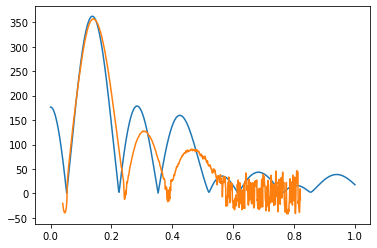

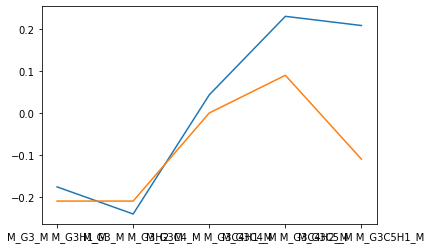

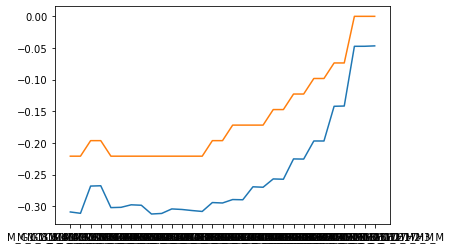

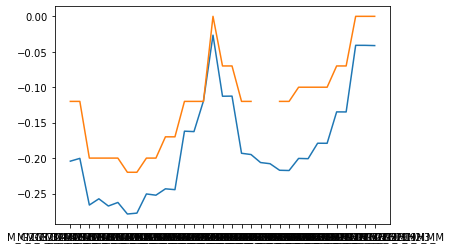

{'M_G1_M M_G1H1_M': [[-0.2926621045269774, 0.0949491829423364, 0.011268394877645752]], 'M_G1_M M_G1H2_M': [[0.05215626195708286, 0.14644560470798168, 0.017379895759054007]], 'M_G1C3_M M_G1C3H1_M': [[-0.3088198483232872, 0.0348850647400579, 0.004140095497840584]], 'M_G1C3_M M_G1C3H2_M': [[-0.310948140517852, 0.036533526707835405, 0.004335731940599432]], 'M_G1C4_M M_G1C4H1_M': [[-0.2679491778646066, 0.03042130586150721, 0.0036103447814741915]], 'M_G1C4_M M_G1C4H2_M': [[-0.2674557079783698, 0.032896883577121894, 0.003904141804106686]], 'M_G1C5_M M_G1C5H1_M': [[-0.3019528129171347, 0.027655206732093533, 0.0032820692103207776]], 'M_G1C5_M M_G1C5H2_M': [[-0.30150686606245797, 0.024579578995439028, 0.0029170593517913934]], 'M_G1C6_M M_G1C6H1_M': [[-0.29752000152765706, 0.024955955326659424, 0.0029617270044384595]], 'M_G1C6_M M_G1C6H2_M': [[-0.2982242105477418, 0.02301091268630251, 0.0027308929114404066]], 'M_G1C7_M M_G1C7H1_M': [[-0.31205559975656594, 0.02018806095088538, 0.002395882045101033

In [22]:
plotSimulation('Simulations/611/eb1/611eb1451b3406f9a07395e74c89a779da77dd0e/7dacf9299757643c2ab76db9536d80031346829f/', 'POPS')

Form factor plotting failed


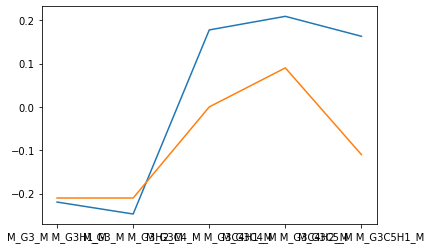

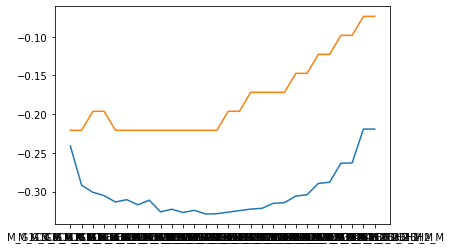

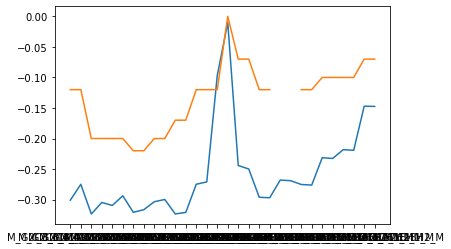

{'M_G1_M M_G1H1_M': [['0.22922', '0.34521', '0.03051']], 'M_G1_M M_G1H2_M': [['0.15818', '0.33624', '0.02972']], 'M_G1C3_M M_G1C3H1_M': [['-0.24092', '0.15234', '0.01346']], 'M_G1C3_M M_G1C3H2_M': [['-0.29165', '0.09962', '0.00881']], 'M_G1C4_M M_G1C4H1_M': [['-0.30085', '0.09283', '0.00821']], 'M_G1C4_M M_G1C4H2_M': [['-0.30511', '0.07976', '0.00705']], 'M_G1C5_M M_G1C5H1_M': [['-0.31338', '0.06297', '0.00557']], 'M_G1C5_M M_G1C5H2_M': [['-0.31037', '0.06447', '0.00570']], 'M_G1C6_M M_G1C6H1_M': [['-0.31700', '0.05523', '0.00488']], 'M_G1C6_M M_G1C6H2_M': [['-0.31104', '0.05627', '0.00497']], 'M_G1C7_M M_G1C7H1_M': [['-0.32606', '0.04595', '0.00406']], 'M_G1C7_M M_G1C7H2_M': [['-0.32273', '0.04543', '0.00402']], 'M_G1C8_M M_G1C8H1_M': [['-0.32694', '0.04293', '0.00379']], 'M_G1C8_M M_G1C8H2_M': [['-0.32409', '0.04408', '0.00390']], 'M_G1C9_M M_G1C9H1_M': [['-0.32889', '0.04000', '0.00354']], 'M_G1C9_M M_G1C9H2_M': [['-0.32852', '0.03744', '0.00331']], 'M_G1C10_M M_G1C10H1_M': [['-0.32

In [30]:
plotSimulation('Simulations/7e2/66a/7e266a6989c04c46a79a2f444b521c595053c4e1/7de7367161b8ffa3b3388f6b5f61825aacf8a360/','POPS')

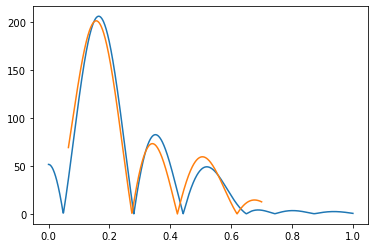

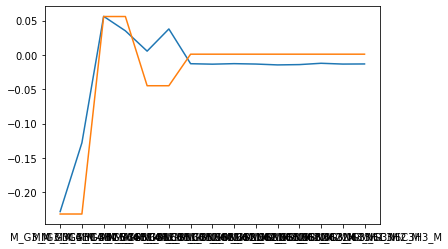

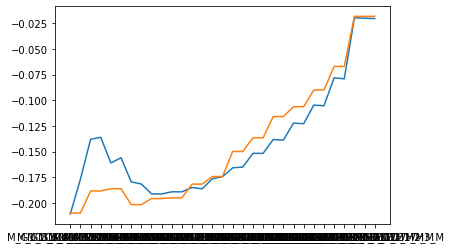

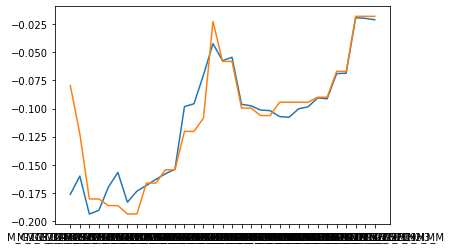

In [33]:
plotSimulation('Simulations/63a/479/63a47940524010d5a2ff46f0d4c89b4b69e0ad4f/9d9ca60b644e801ec759177e4b1cbe5bf413fe25/','POPC')

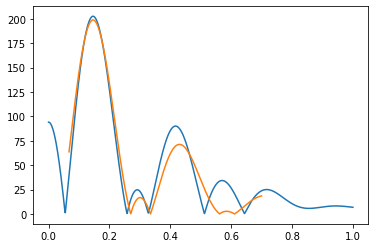

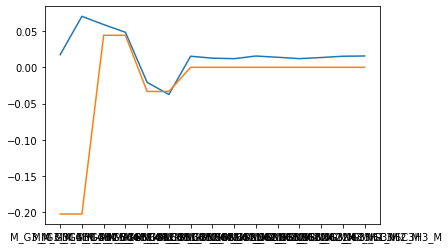

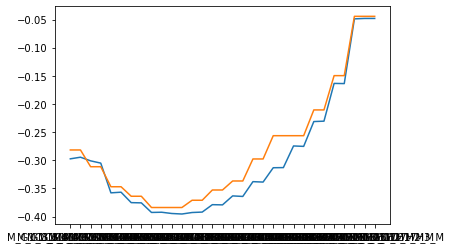

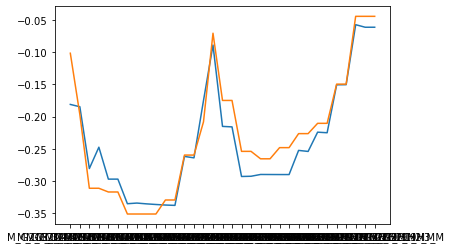

In [5]:
plotSimulation('Simulations/8cb/989/8cb989e1813b93d1144d731ffbbc04a5cfcfb6a6/2db4e1d512355edd21cedbc0d28a45659dd6faa9/','POPC')